# The Story of COVID-19 in India

The COVID-19 pandemic is the defining global health crisis of our time and the greatest global humanitarian challenge the world has faced since World War II. The virus has spread widely, and the number of cases is rising daily as governments work to slow its spread. India has moved quickly, implementing a proactive, nationwide, lockdown, with the goal of flattening the curve and using the time to plan and resource responses adequately.

![caption](timeline.png)

# How it spreads and how it progress?

![caption](a.jpg)

In [1]:
#Data wrangling
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

#vizualization
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import squarify
import plotly.offline as py
import plotly.graph_objects as go
import plotly_express as px

from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading Data
age_detail = pd.read_csv("D:/py/covid-in-india/AgeGroupDetails.csv")
india_covid_19 = pd.read_csv('D:/py/covid-in-india/covid_19_india.csv')
hospital_beds = pd.read_csv('D:/py/covid-in-india/HospitalBedsIndia.csv')
individual_details = pd.read_csv('D:/py/covid-in-india/IndividualDetails.csv')
state = pd.read_csv('D:/py/covid-in-india/states.csv')
state_wise = pd.read_csv("D:/py/covid-in-india/state_wise.csv")
state_wise_daily = pd.read_csv('D:/py/covid-in-india/state_wise_daily.csv')
district = pd.read_csv('D:/py/covid-in-india/districts.csv')
district_wise = pd.read_csv('D:/py/covid-in-india/district_wise.csv')
vaccine_statewise = pd.read_csv('D:/py/covid-in-india/covid_vaccine_statewise.csv')
case_time_series = pd.read_csv('D:/py/covid-in-india/case_time_series.csv')
icmr_labs = pd.read_csv('D:/py/covid-in-india/icmr_labs_statewise.csv')
icmr_test = pd.read_csv('D:/py/covid-in-india/icmr_rtpcr_tests_daily.csv')
population = pd.read_csv('D:/py/covid-in-india/Indian States Population and Area.csv')
vaccine_doses_statewise = pd.read_csv('D:/py/covid-in-india/vaccine_doses_statewise.csv')
tested_icpr = pd.read_csv('D:/py/covid-in-india/tested_numbers_icmr_data.csv')
statewise_test = pd.read_csv('D:/py/covid-in-india/StatewiseTestingDetails.csv')

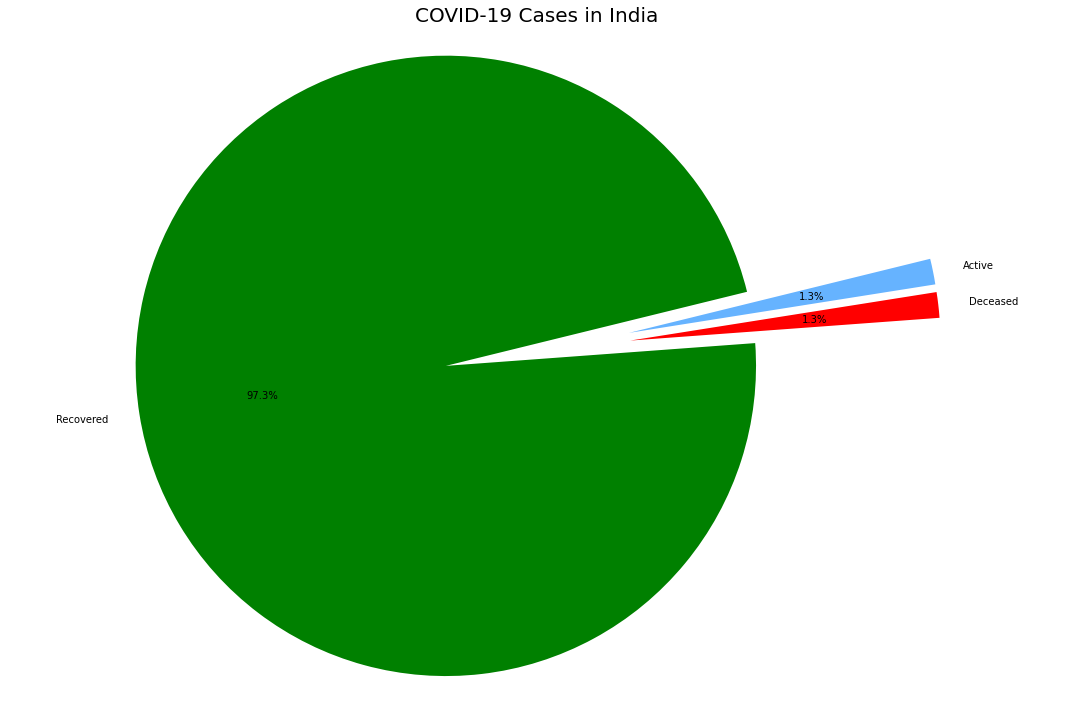

In [3]:
total_recovered = state_wise.iloc[0,2]
total_death = state_wise.iloc[0,3]
total_active = state_wise.iloc[0,4]

labels = ['Active','Recovered','Deceased']
sizes = [total_active,total_recovered,total_death]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.3)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.0,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('COVID-19 Cases in India',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

We can see that 97% cases have been recovered successfully til July 18, 2021.

# Is Delta Variant more dangerous??

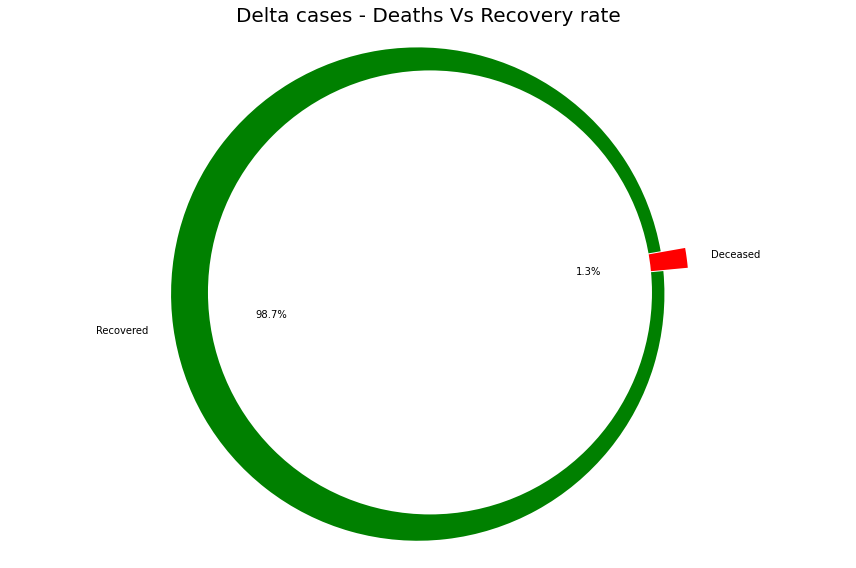

In [4]:
delta_recoverd = state_wise.iloc[0,9]
delta_death = state_wise.iloc[0,10]

labels = ['Recovered','Deceased']
sizes = [delta_recoverd,delta_death]
color= ['green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (12,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=10, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.90,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Delta cases - Deaths Vs Recovery rate',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

As we can see delta variant cases have a good recovery rate. So just maintain social distancing and use mask to avoid contact.                                         
                                            Stay safe & Stay Healthy :)

# Which state is suffering the most?

In [5]:
merege1 = pd.merge(left=state_wise, right=population, left_on='State', right_on='State')

In [6]:
sort_df= merege1.sort_values('Confirmed',ascending=False)
fig = px.bar(sort_df, x="State",
             y="Confirmed",
             text="Confirmed",
             color = "Confirmed",
             barmode="group",
             labels={'Confirmed':'Total cases'},
             title="State-wise Confirmed Cases in India")
fig.update_traces(texttemplate='%{text:.1s}', textposition='outside')
fig.update_layout(uniformtext_minsize=5,)
fig.show()

We can see Maharashtra is by far have highest number of Corona cases and Lakshadweep have least cases on record till 8 july 2021.

# Which Age Groups are having more positive cases?

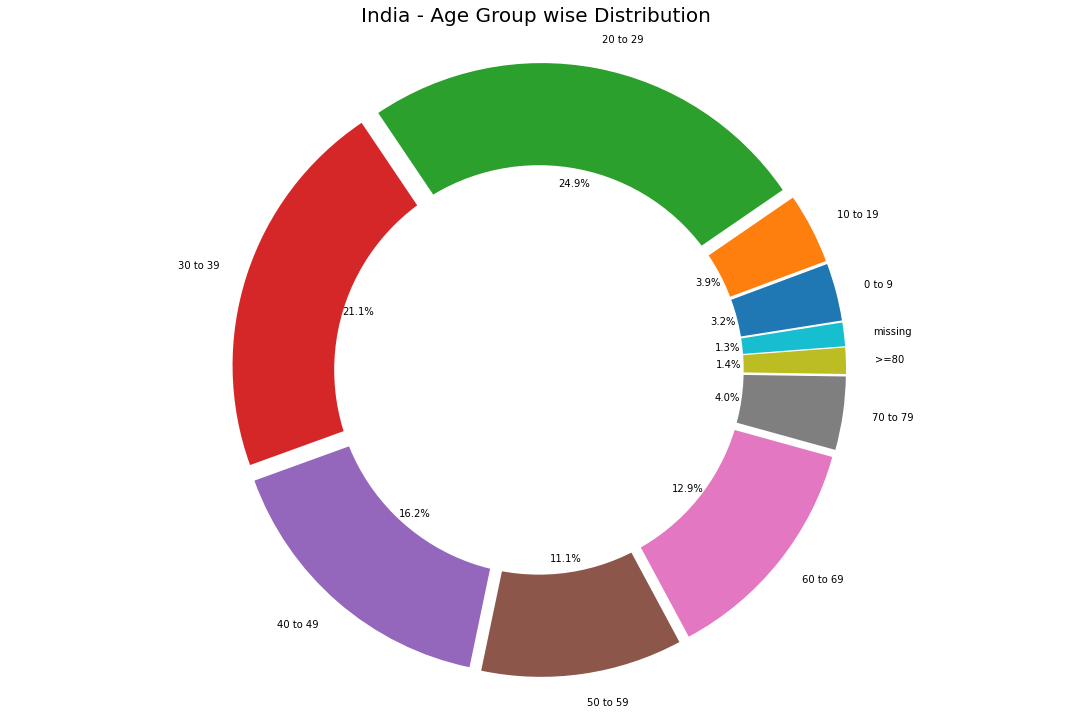

In [7]:
labels = list(age_detail['Age group'])
sizes = list(age_detail['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

We can see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

# Corona most interested in Males or Females?

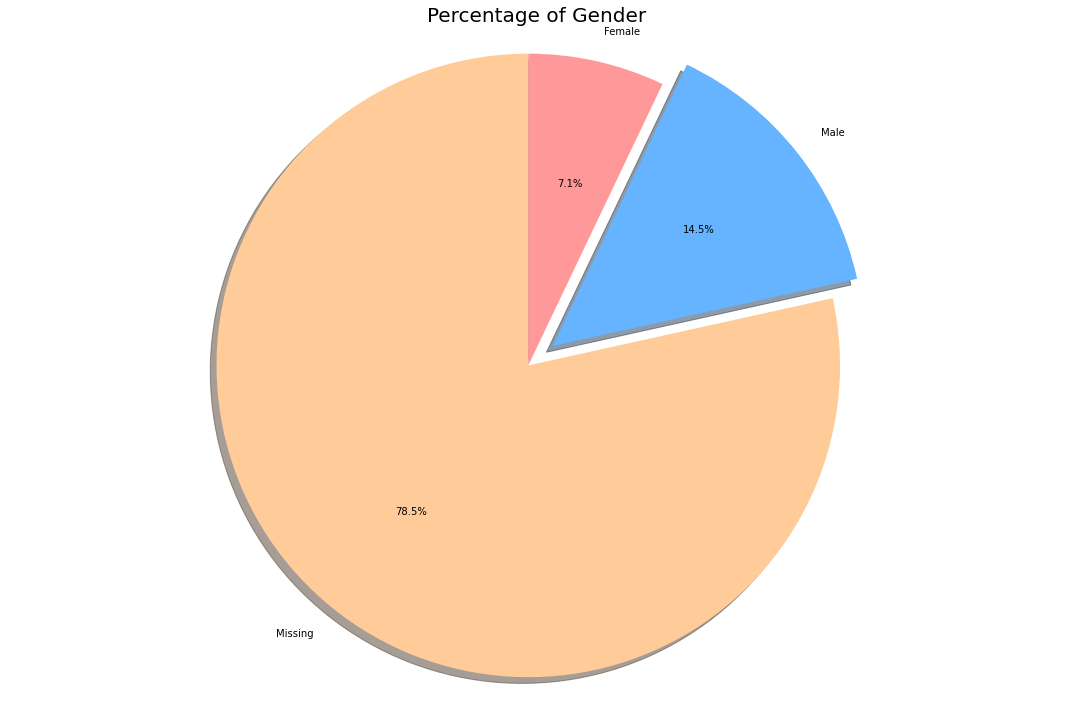

In [8]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['gender'].isnull().sum())
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ffcc99','#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

*80% of the patients gender information is missing. lets remove them and then analyze.

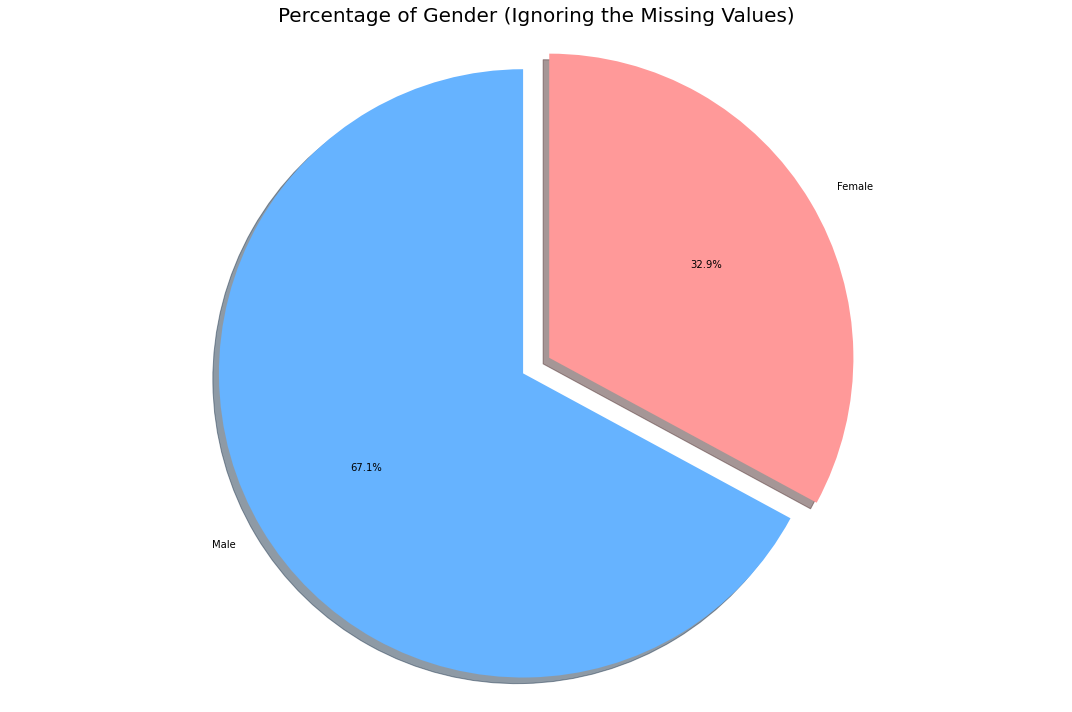

In [9]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()

Men are the most affected accounting to 67%. But, remember we have ~80% data missing.

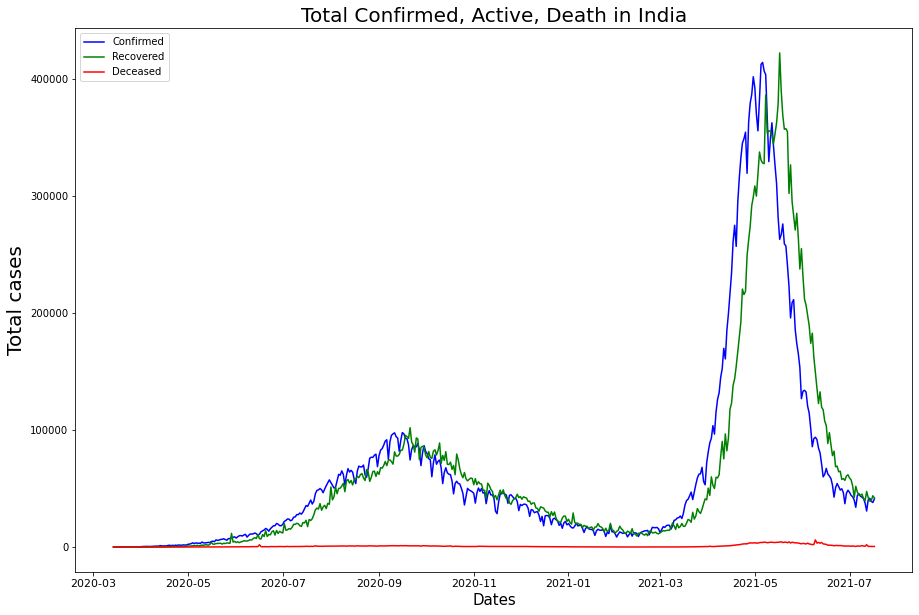


	Cases in India as of July 7, 2021


      Date  Confirmed  Deceased  Recovered
2021-07-17      41283       517      42049
2021-07-16      38115       560      43878
2021-07-15      39071       544      39827
2021-07-14      41759       578      39293
2021-07-13      40314       625      42436


In [10]:
df = state_wise_daily.iloc[:,[1,2,3]]
df = df.rename(columns={"Date_YMD":"Date"})

df=df.pivot(index="Date",columns=["Status"], values="TT")
df.reset_index(level=0, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize= (15,10))
plt.xticks(rotation = 0 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 15)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= df["Confirmed"],x= df["Date"],linestyle ='-',color = 'b', markersize=0)
ax2 = plt.plot_date(y= df["Recovered"],x= df["Date"],linestyle ='-',color = 'g', markersize=0)
ax3 = plt.plot_date(y= df["Deceased"],x= df["Date"],linestyle ='-',color = 'r', markersize=0)

plt.legend(["Confirmed", "Recovered", "Deceased"],loc="upper left")
plt.show()

top_5=df.sort_values('Date',ascending=False).head()
print("\n\tCases in India as of July 7, 2021\n\n")
print(top_5.to_string(index=False))

# What happend After lockdown ended in 2021 from June 21?

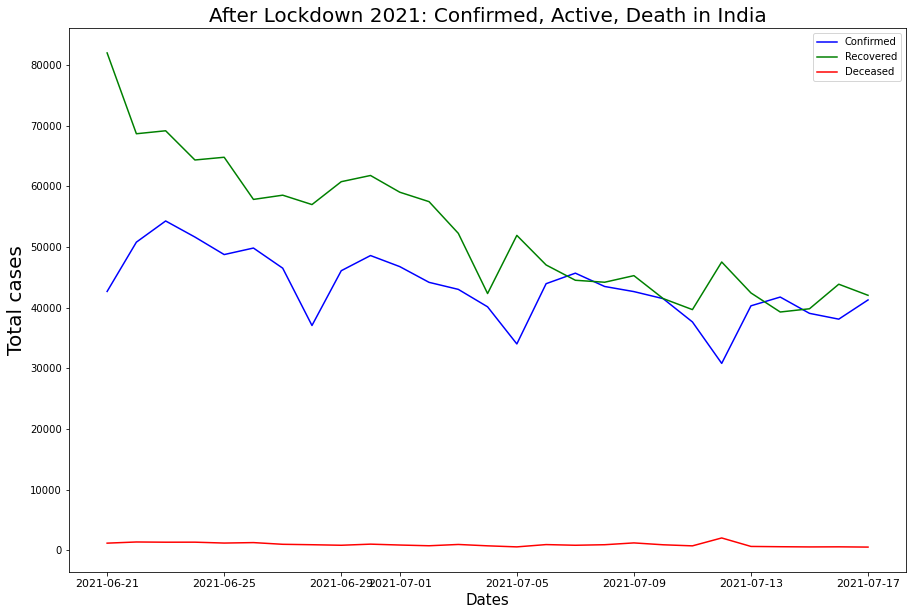

In [11]:
after_lockdown = df.iloc[464:]
after_lockdown.reset_index()

plt.figure(figsize= (15,10))
plt.xticks(rotation = 0 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 15)
plt.ylabel('Total cases',fontsize = 20)
plt.title("After Lockdown 2021: Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= after_lockdown["Confirmed"],x= after_lockdown["Date"],linestyle ='-',color = 'b', markersize=0)
ax2 = plt.plot_date(y= after_lockdown["Recovered"],x= after_lockdown["Date"],linestyle ='-',color = 'g', markersize=0)
ax3 = plt.plot_date(y= after_lockdown["Deceased"],x= after_lockdown["Date"],linestyle ='-',color = 'r', markersize=0)

plt.legend(["Confirmed", "Recovered", "Deceased"],loc="best")
plt.show()


As we can see there is a fall in recovered rate. But there is not much difference in daily cases and death rate is also constant. Lets see death rate in detail.

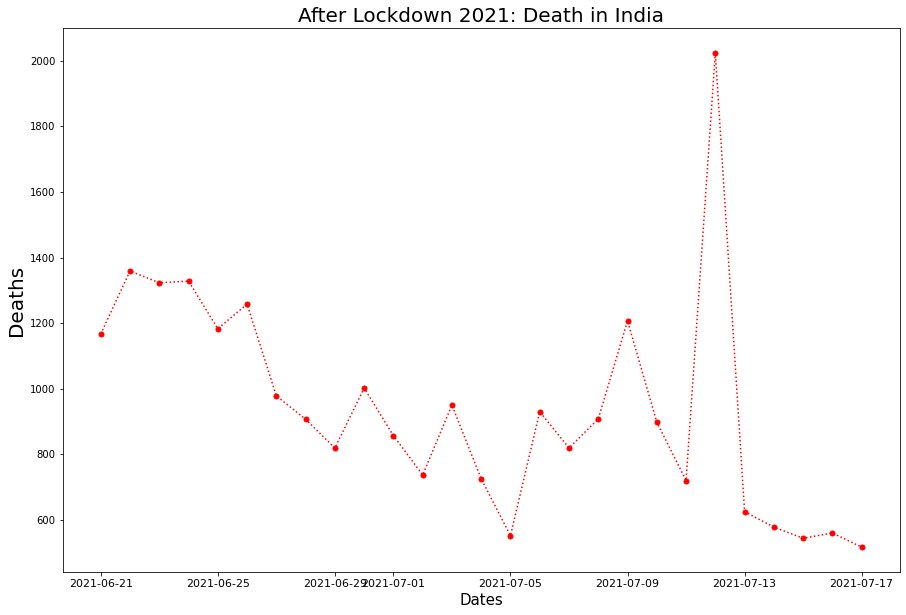

In [12]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 0 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 15)
plt.ylabel('Deaths',fontsize = 20)
plt.title("After Lockdown 2021: Death in India" , fontsize = 20)

ax3 = plt.plot_date(y= after_lockdown["Deceased"],x= after_lockdown["Date"],linestyle =':',color = 'r', markersize=5)
plt.show()

We could see there is a spike in death rate in 12 july (around 2000 deaths) but then a fall in last 5 days.

# How many care centres are there in India?

In [13]:
hospital_beds['total'].iloc[36]=hospital_beds['total'].iloc[36].replace(",", "")
hospital_beds['total'] = pd.to_numeric(hospital_beds['total'])
hospital_beds['beds in public hospitals'].iloc[36]=hospital_beds['beds in public hospitals'].iloc[36].replace(",", "")
hospital_beds['beds in public hospitals'] = pd.to_numeric(hospital_beds['beds in public hospitals'])
hospital_beds['No. of Rural hospitals'] = pd.to_numeric(hospital_beds['No. of Rural hospitals'])
hospital_beds['beds in Rural hospitals'] = pd.to_numeric(hospital_beds['beds in Rural hospitals'])
hospital_beds['No. of Urban hospitals'] = pd.to_numeric(hospital_beds['No. of Urban hospitals'])
hospital_beds['Beds in Urban hospitals'] = pd.to_numeric(hospital_beds['Beds in Urban hospitals'])

In [14]:
hospital_beds = hospital_beds.drop(columns=['PHC','CHC','SDH','DH'])
A = pd.melt(hospital_beds, 
                        id_vars=['States'], 
                        value_vars=['total', 'No. of Rural hospitals', 'No. of Urban hospitals'])

B = pd.melt(hospital_beds, 
                        id_vars=['States'], 
                        value_vars=['beds in public hospitals', 'beds in Rural hospitals', 'Beds in Urban hospitals'])

A = A.rename(columns={"variable": "Hospital_type", "value": "No_of_hospitals"})
B = B.rename(columns={"variable": "Hospital_beds", "value": "No_of_beds"})

df = pd.merge(left=A, right=B, left_on='States', right_on='States')
df.loc[df['Hospital_type']=='total', 'Hospital_type']='No. of Public hospitals'

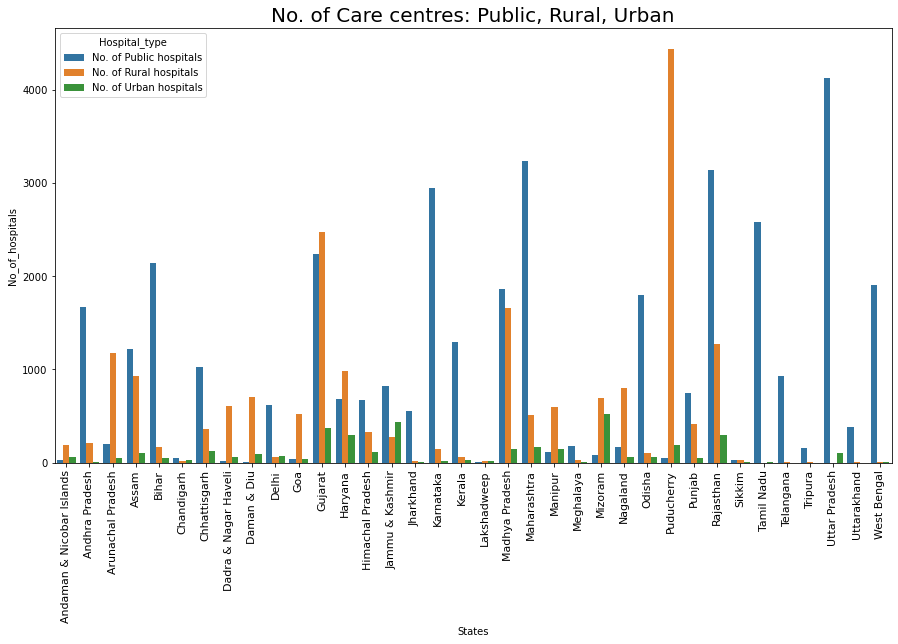

In [15]:
plt.figure(figsize= (15,8))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.title("No. of Care centres: Public, Rural, Urban" , fontsize = 20)
sns.barplot(x="States", y="No_of_hospitals", data=df.iloc[:-9], hue='Hospital_type')
plt.show()

As one could see the Highest Public, Rural and Urban Care Centres are in U.P., Panducherry and Mizoram.
The least Public, Rural and Urban Care centres are in Lakshadweep, Tripura and Uttrakhand.

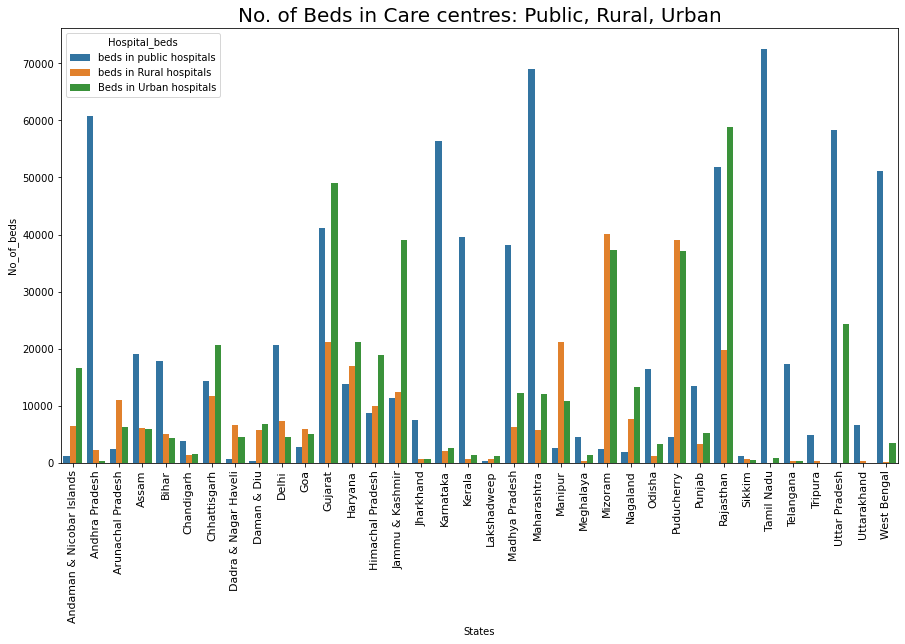

In [16]:
plt.figure(figsize= (15,8))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.title("No. of Beds in Care centres: Public, Rural, Urban" , fontsize = 20)
sns.barplot(x="States", y="No_of_beds", data=df.iloc[:-9], hue='Hospital_beds')
plt.show()

As one could see the Highest Public, Rural and Urban beds in Care centres are in Tamilnadu, Mizoram and Rajasthan.

# Test Sample Being Collected All Over Country. But How much?

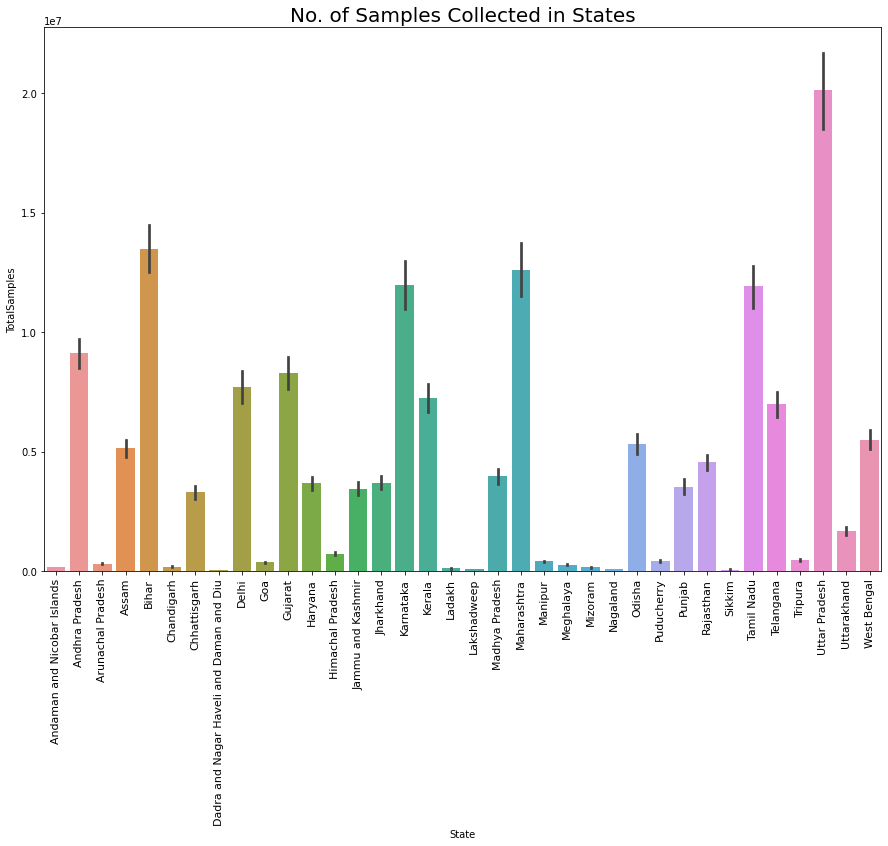

In [17]:
statewise_test['Date'] = pd.to_datetime(statewise_test['Date'])

plt.figure(figsize=(15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.title("No. of Samples Collected in States" , fontsize = 20)

sns.barplot(data=statewise_test,
           x='State',
           y='TotalSamples')
plt.show()

# How Many Survive out of 100 ??

In [18]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

# 2 Month Confirmed Positive Rate in State With Moving Average

:: I'm going to take top 15 State Data for this.

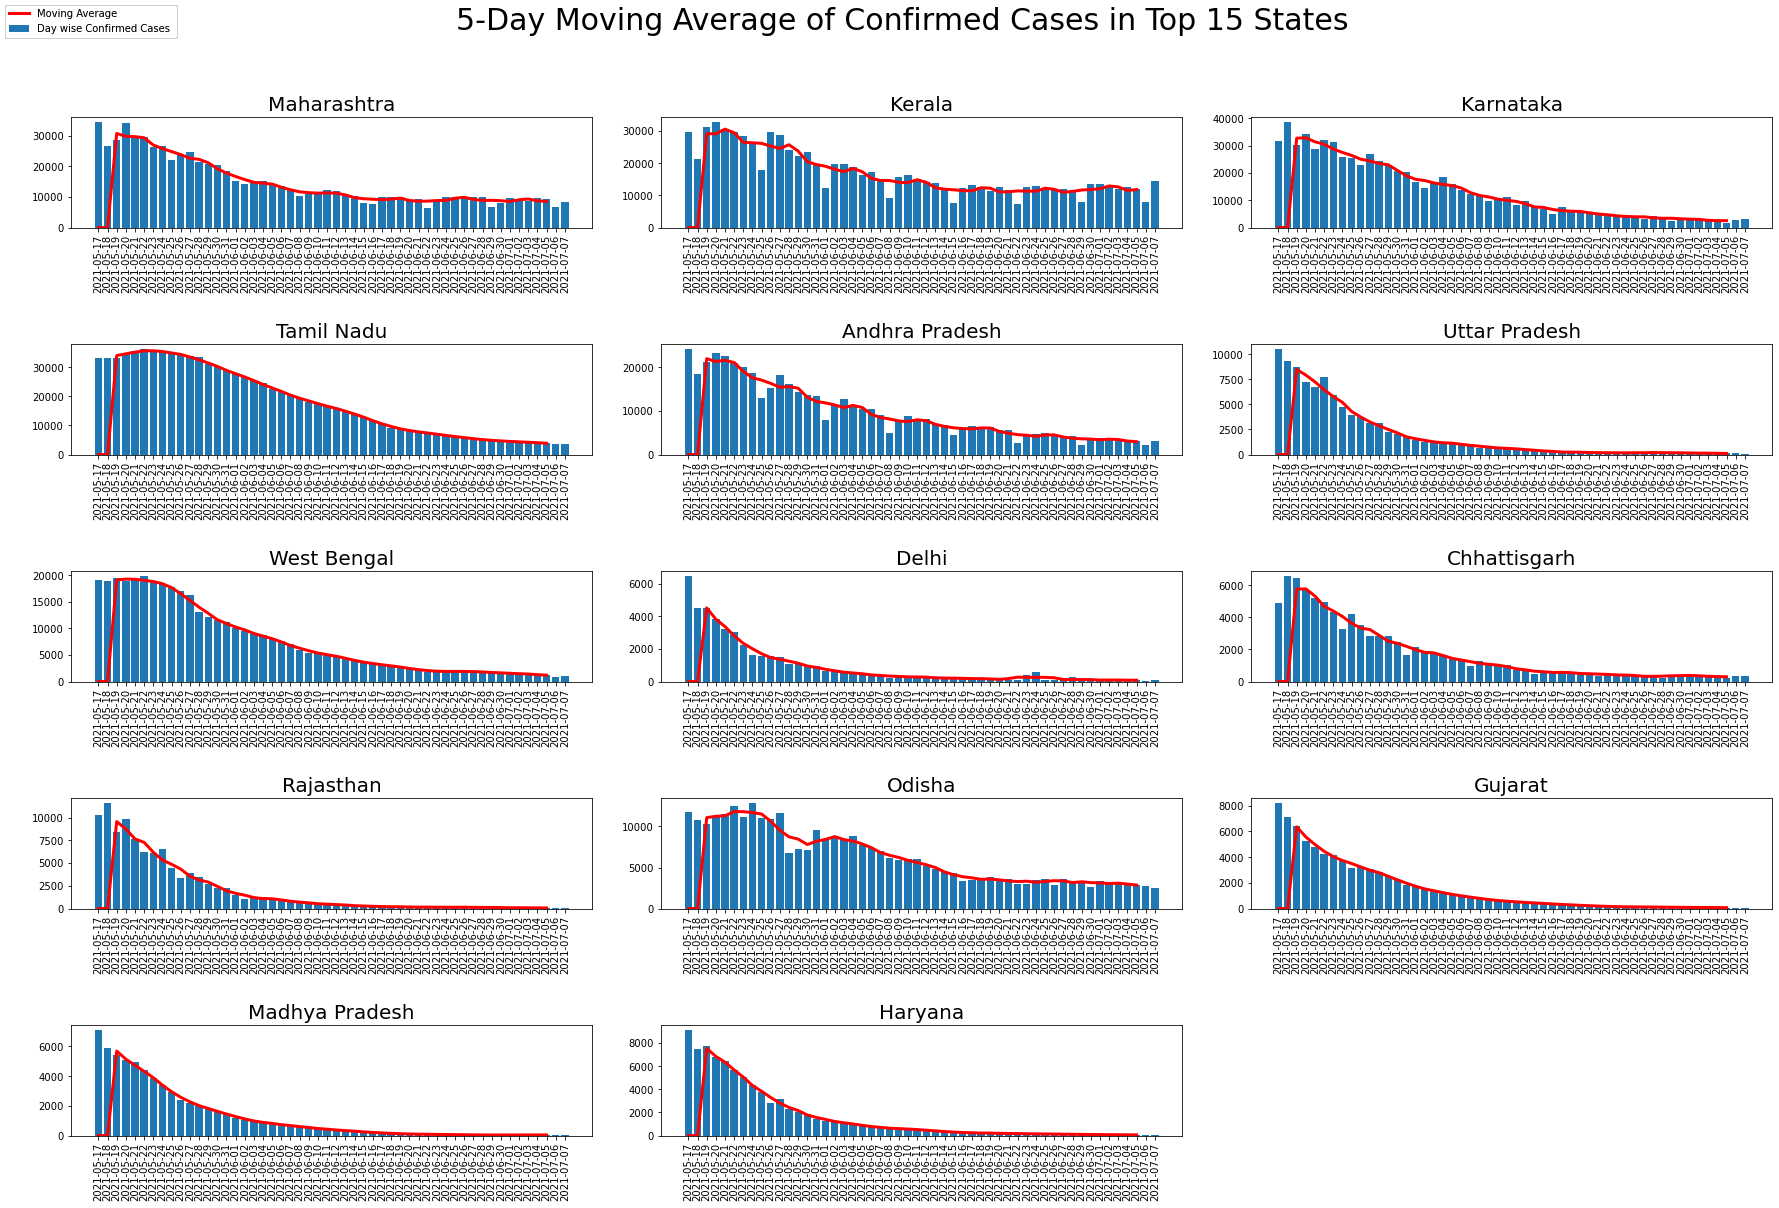

In [19]:
all_state = list(india_covid_19['State/UnionTerritory'].unique())
all_state.remove('Unassigned')

latest = india_covid_19[india_covid_19['Date'] > '2021-05-15']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
def calc_movingaverage(values ,N):    
    cumsum, moving_aves = [0], [0,0]
    for i, x in enumerate(values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

fig = plt.figure(figsize= (25,17))
plt.suptitle('5-Day Moving Average of Confirmed Cases in Top 15 States',fontsize = 30,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    plt.xticks(rotation = 90 )
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    moving_aves = calc_movingaverage(states_confirmed[states[k]],5)
    ax.plot(states_dates[states[k]][:-2],moving_aves,color='red',label = 'Moving Average',linewidth =3)  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

# How Much Growth Shown by These States ?

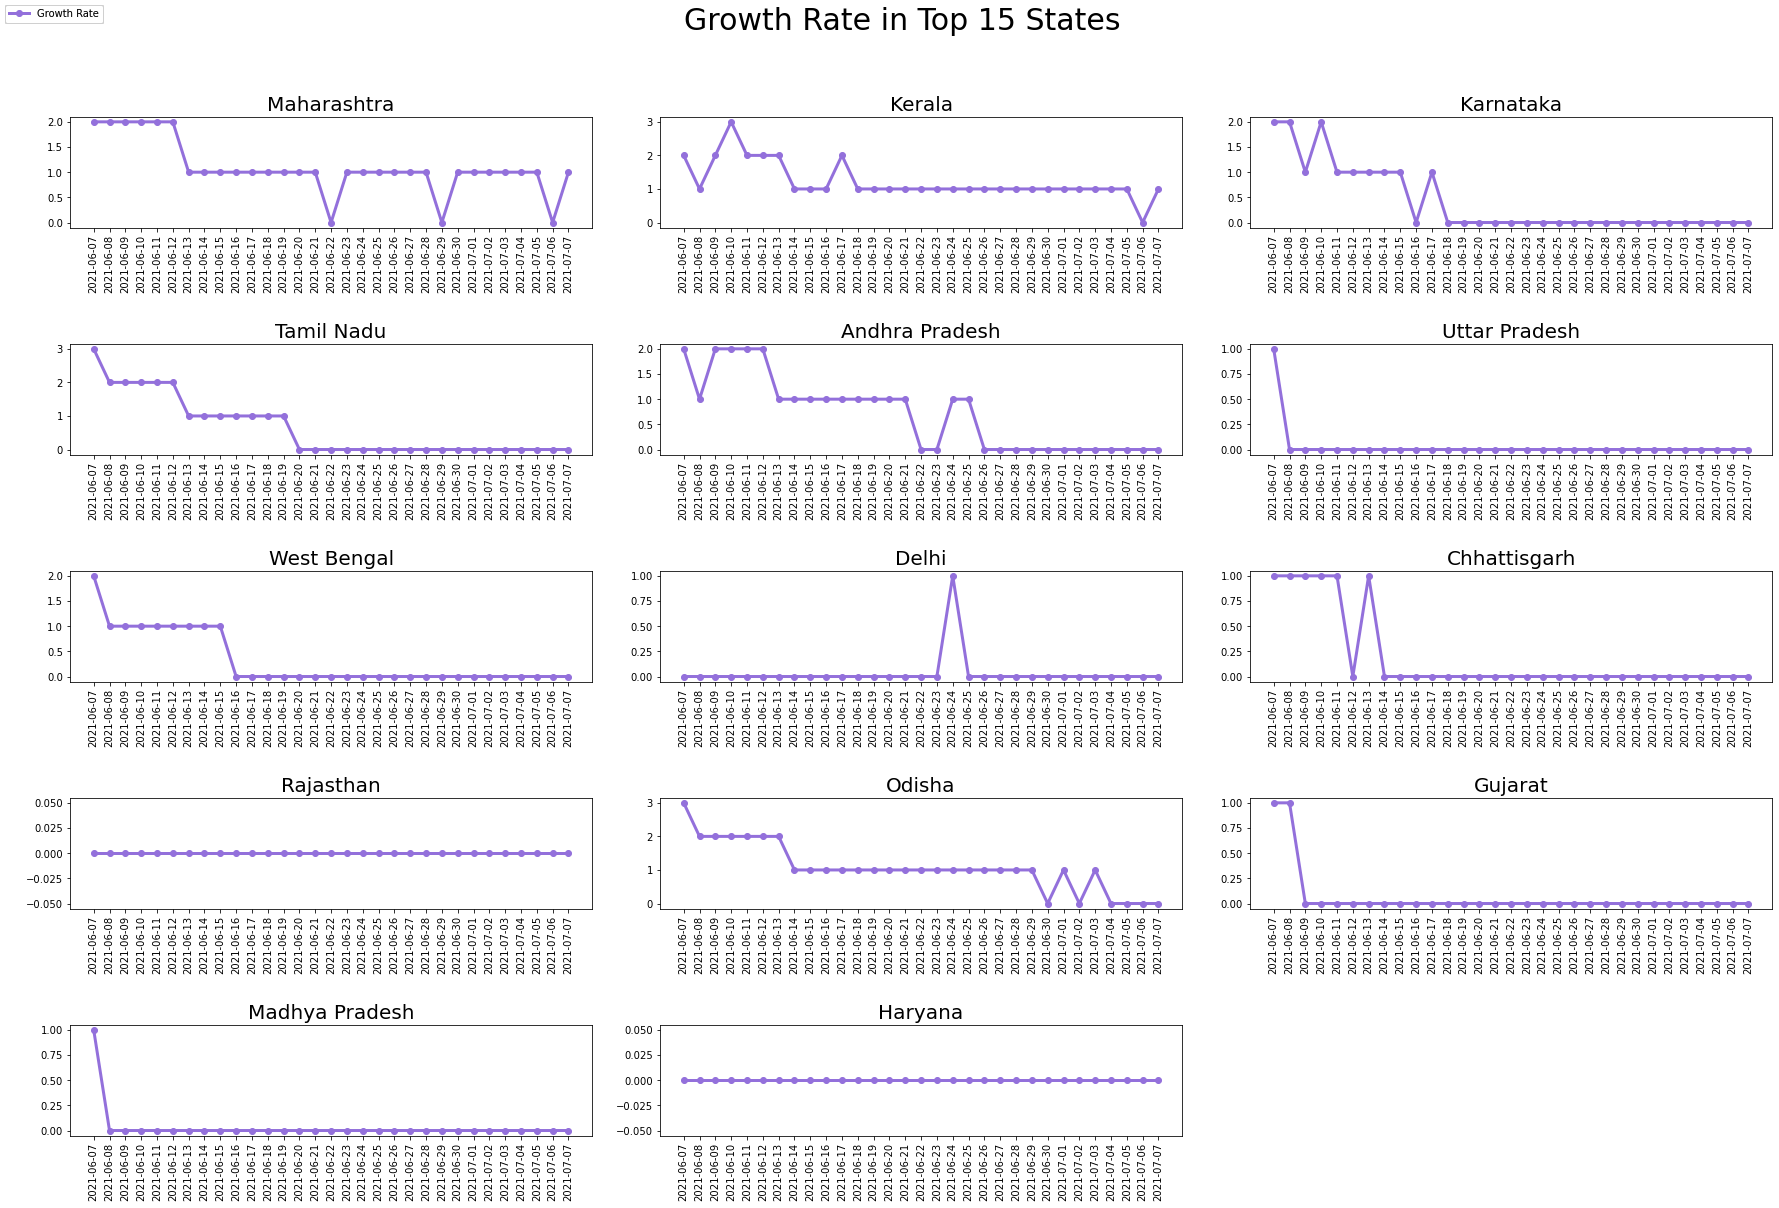

In [20]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 30,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    plt.xticks(rotation = 90 ) 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

# Which district are you from ? Hope You're Doing Well !!

## Lets check which district are more affected.  

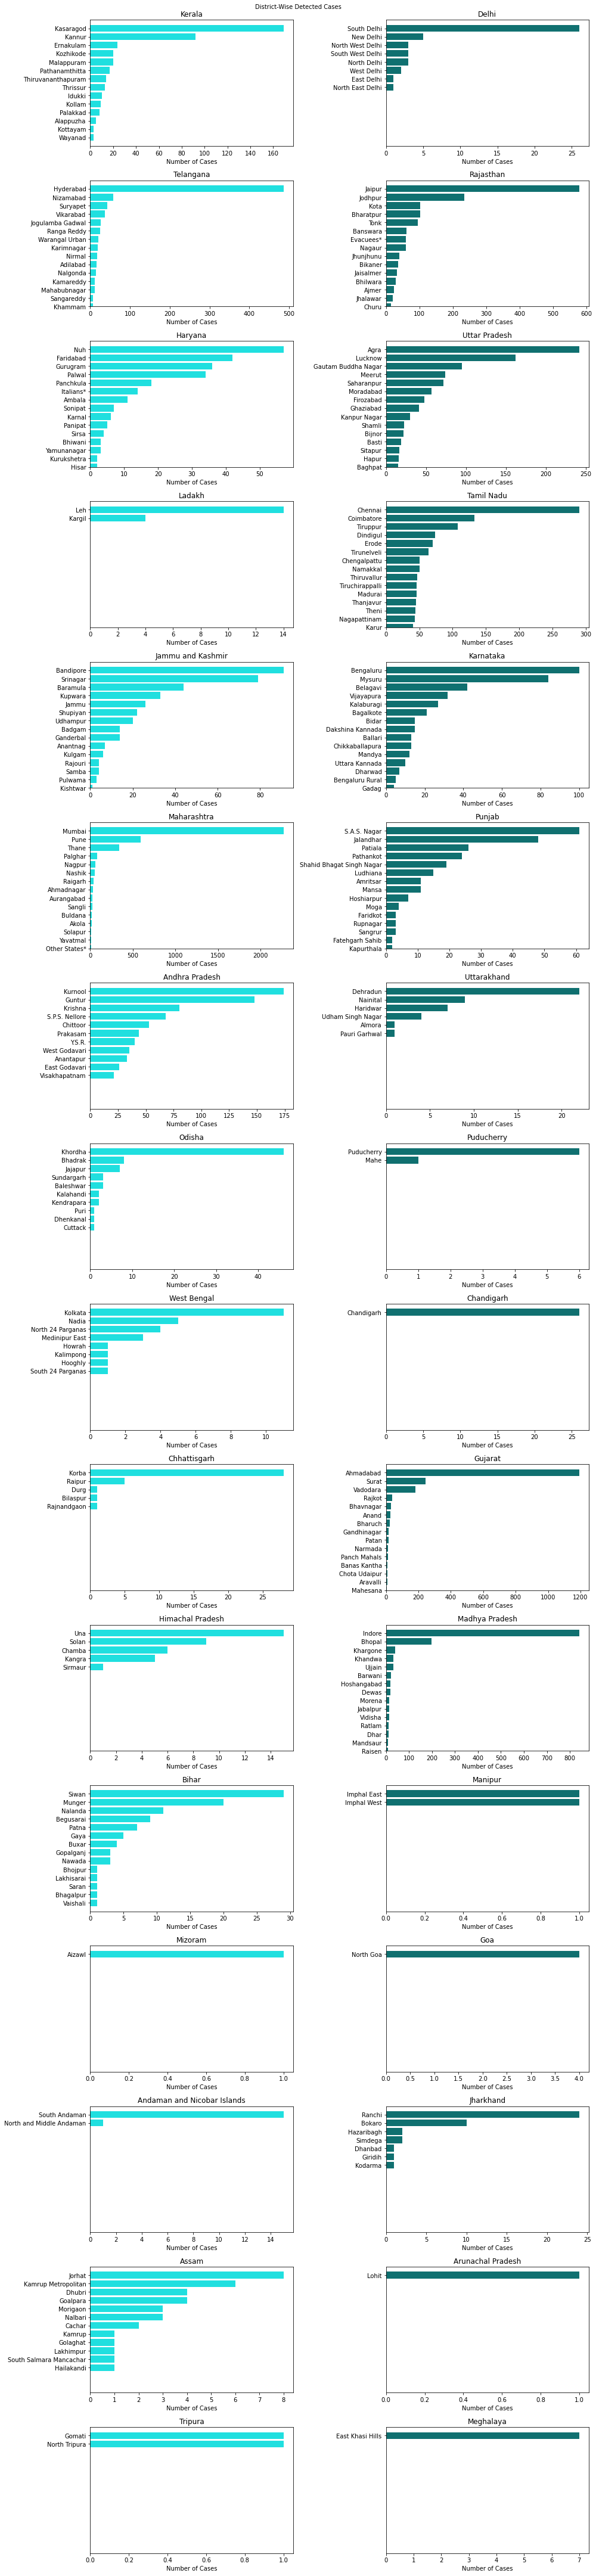

In [21]:
colors_list = ['cyan','teal']

states = individual_details['detected_state'].unique()
if len(states)%2==0:
    n_rows = int(len(states)/2)
else:
    n_rows = int((len(states)+1)/2)    
plt.figure(figsize=(14,60))

for idx,state in enumerate(states):    
    plt.subplot(n_rows,2,idx+1)
    y_order = individual_details[individual_details['detected_state']==state]['detected_district'].value_counts().index
    try:
        g = sns.countplot(data=individual_details[individual_details['detected_state']==state],y='detected_district',orient='v',color=colors_list[idx%2],order=y_order)
        plt.xlabel('Number of Cases')
        plt.ylabel('')
        plt.title(state)
        plt.ylim(14,-1)
    except:
        pass
plt.tight_layout()
plt.suptitle('District-Wise Detected Cases',fontsize = 10,y=1.0)
plt.show()

# Health Centres and Beds Available.

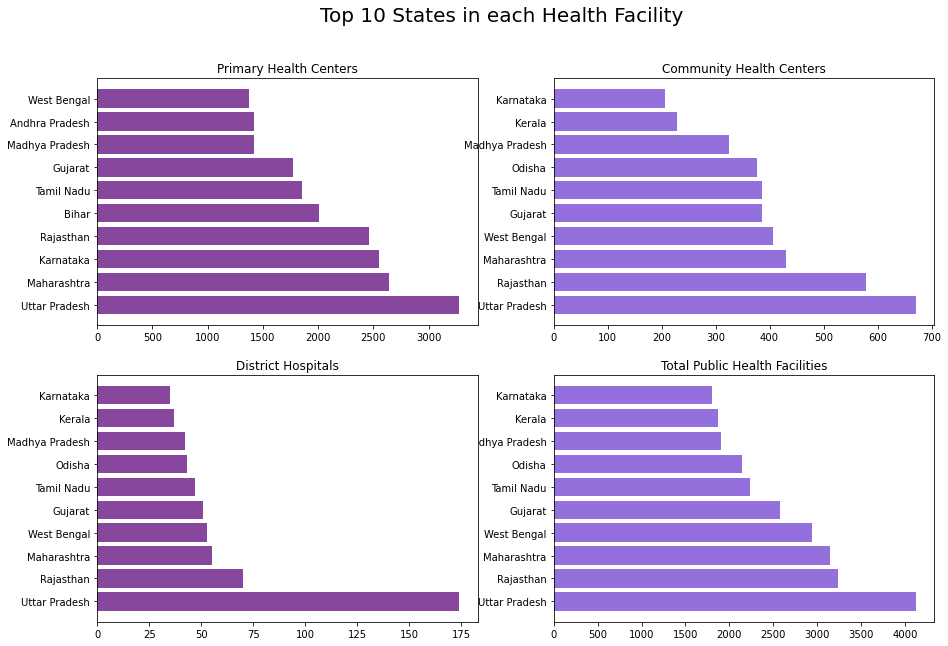

In [22]:
hospital_beds = pd.read_csv('D:/py/covid-in-india/HospitalBedsIndia.csv')

hospital_beds['PHC'].iloc[36]=hospital_beds['PHC'].iloc[36].replace(",", "")
hospital_beds['CHC'].iloc[36]=hospital_beds['CHC'].iloc[36].replace(",", "")
hospital_beds['beds in public hospitals'].iloc[36]=hospital_beds['beds in public hospitals'].iloc[36].replace(",", "")
hospital_beds['total'].iloc[36]=hospital_beds['total'].iloc[36].replace(",", "")
hospital_beds['DH'].iloc[36]=hospital_beds['DH'].iloc[36].replace(",", "")

hospital_beds['PHC'] = pd.to_numeric(hospital_beds['PHC'])
hospital_beds['CHC'] = pd.to_numeric(hospital_beds['CHC'])
hospital_beds['DH'] = pd.to_numeric(hospital_beds['DH'])
hospital_beds['beds in public hospitals'] = pd.to_numeric(hospital_beds['beds in public hospitals'])
hospital_beds['total'] = pd.to_numeric(hospital_beds['total'])

hospital_beds = hospital_beds.iloc[:-1]

top_10_primary = hospital_beds.nlargest(10,'PHC')
top_10_community = hospital_beds.nlargest(10,'CHC')
top_10_district_hospitals = hospital_beds.nlargest(10,'DH')
top_10_public_facility = hospital_beds.nlargest(10,'total')
top_10_public_beds = hospital_beds.nlargest(10,'beds in public hospitals')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['States'],top_10_primary['PHC'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['States'],top_10_community['CHC'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['States'],top_10_public_facility['total'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['States'],top_10_district_hospitals['DH'],color = '#87479d');

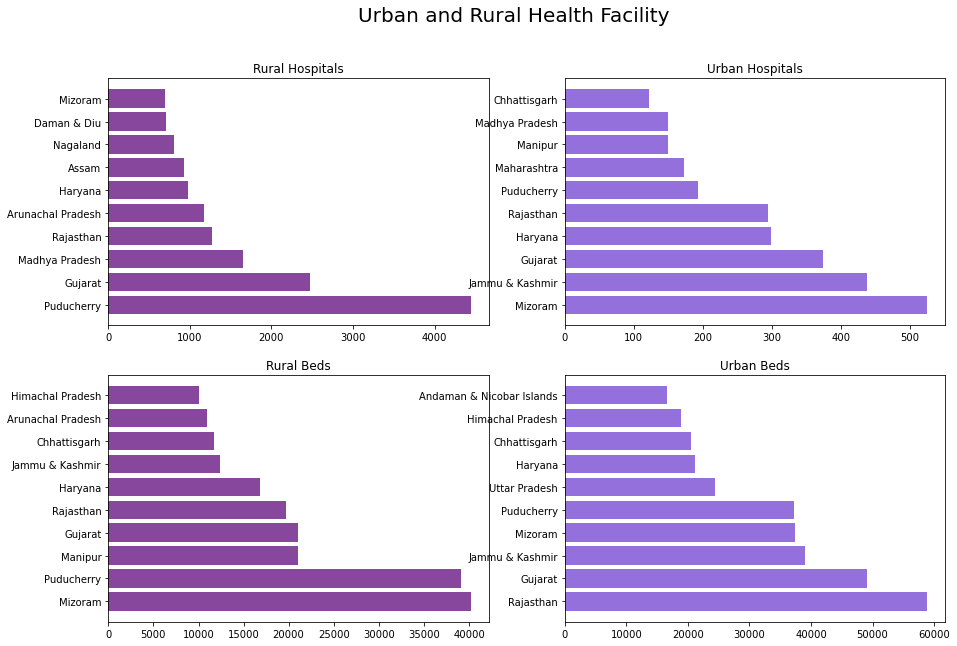

In [23]:
top_rural_hos = hospital_beds.nlargest(10,'No. of Rural hospitals')
top_rural_beds = hospital_beds.nlargest(10,'beds in Rural hospitals')
top_urban_hos = hospital_beds.nlargest(10,'No. of Urban hospitals')
top_urban_beds = hospital_beds.nlargest(10,'Beds in Urban hospitals')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['States'],top_rural_hos['No. of Rural hospitals'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['States'],top_urban_hos['No. of Urban hospitals'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['States'],top_rural_beds['beds in Rural hospitals'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['States'],top_urban_beds['Beds in Urban hospitals'],color = '#9370db');

# How Many Positive Out Of Total Test Samples?

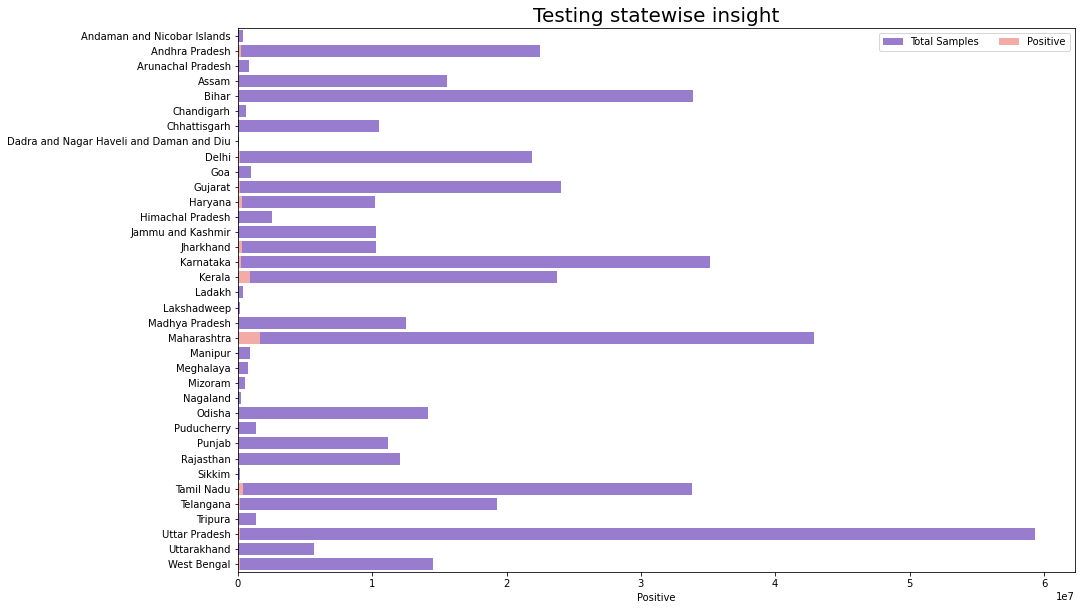

In [24]:
state_test = pd.pivot_table(statewise_test, values=['TotalSamples','Negative','Positive'], fill_value=0, index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#9370db')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='r')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="upper right", frameon=True);

# Economic Impact of COVID-19 on India

The coronavirus is having a growing impact on the Indian economy. Here is an interesting insight on how an extenstion of the lockdown would affect the economy (Credits: McKincy & Company) 

![caption](SVGZ.jpg)

![caption](eco.jpg)

# Stay home! Stay Safe!